# Input and Output in Python

## Libraries and settings

In [1]:
# Libraries
import os
import re
import json
import folium
import sqlite3
import requests
import pandas as pd
import matplotlib.pyplot as plt

from zipfile import ZipFile
from bs4 import BeautifulSoup

from PyPDF2 import PdfReader

from reportlab.lib.units import inch
from reportlab.lib.colors import blue
from reportlab.lib.pagesizes import LETTER
from reportlab.pdfgen.canvas import Canvas

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/scientific_programming/Week_03/exercises


## Read & write data from/to a database
Most data driven companies store their data in database management system. <b style="color:yellowgreen">SQLite</b> is a lightweight relational database management system (RDBMS). With python you can connect to a SQLite DB and make requests using SQL.

### Write data to a database

In [2]:
# Create e new db
conn = sqlite3.connect('./data/example_sqlite.db')

# Close connection to db
conn.close()

In [3]:
# Open connection to db
conn = sqlite3.connect('./data/example_sqlite.db')

# Define variables and data types for the (empty) table
conn.execute('''CREATE TABLE IF NOT EXISTS COMPANY
             (ID INT PRIMARY KEY     NOT NULL,
             NAME           TEXT    NOT NULL,
             AGE            INT     NOT NULL,
             CITY        CHAR(50),
             SALARY         REAL);''')

# Read data from a file and write to data frame
data = pd.read_excel("./data/db_data.xlsx", sheet_name = "Sheet1")
print(data)

# Write data to the data base table named 'COMPANY'
data.to_sql('COMPANY', conn, if_exists='replace')

# Commit the changes to the table
conn.commit()

# Close connection to db
conn.close()

    NAME  AGE      CITY  SALARY
0  Peter   25    Berlin   85000
1   Mary   30    London   95000
2   Anne   24    Zürich  125000
3    Joe   28  New York  115000
4   Mike   27     Paris   75000
5    Sue   26    London   95000


### Query the database using SQL and write result to a pandas data frame

In [4]:
# Connection to db
conn = sqlite3.connect("./data/example_sqlite.db")

# Read data
df_sub = pd.read_sql('''SELECT * 
                        FROM COMPANY 
                        WHERE AGE <= 26''', 
                     con=conn,
                     index_col=['index'])
print(df_sub)
    
# Close connection to db
conn.close()

        NAME  AGE    CITY  SALARY
index                            
0      Peter   25  Berlin   85000
2       Anne   24  Zürich  125000
5        Sue   26  London   95000


## Read & write data from/to files

### Common data/file formats

Data formats in information technology may refer to:

- Data type, constraint placed upon the interpretation of data in a type system
- Signal (electrical engineering), a format for signal data used in signal processing
- Recording format, a format for encoding data for storage on a storage medium
- <b style="color:yellowgreen">File format, a format for encoding data for storage in a computer file</b>
- Container format (digital), a format for encoding data for storage by means of a standardized audio/video codecs file format
- Content format, a format for representing media content as data
- Audio format, a format for encoded sound data
- Video format, a format for encoded video data

Wikipedia: https://en.wikipedia.org/wiki/Data_format

This section provides common <b style="color:yellowgreen">file formats</b> a data scientist or a data engineer must be aware of. Later, we’ll see how to read these file formats in Python.

List with common file formats explained in this notebook:
- CSV
- TXT
- JSON
- XML
- HTML
- ZIP
- XLSX
- PDF
- Image files (e.g. JPEG)

### CSV (comma separated value)

- A comma-separated values (CSV) file is a delimited text file.
- Each line of the file is a data record.
- Each record consists of one or more fields, separated by a separator (default = comma).
- The use of the comma as a field separator is the source of the name for this file format.
- The seperator can also be user-defined, e.g. you can also use a semicolon instead of a comma.
- A CSV file typically stores tabular data (numbers and text).

In [5]:
# Read data from .csv-file using pandas (here the separator is a semicolon)
data = pd.read_csv("./data/example.csv", sep=";")

# Print the header info of data (first five rows)
print(data.head(5))

# Write data to csv
data.to_csv("data/example_write.csv", sep=";")

   chicken_id       weight              breed  eggs_per_year
0           1  2728.854920  New Hampshire Red            158
1           2  2323.761365         Australorp            273
2           3  2635.062034  New Hampshire Red            153
3           4  2603.985152      Plymouth Rock            268
4           5  3079.394487         Australorp            360


### TXT (plain text)

- In Plain Text file format, everything is written in plain text
- Usually, this text is in unstructured form and there is no meta-data associated with it
- The TXT file format can easily be read by any program

In [6]:
# Open a connection to the text-file
text_file = open("./data/example.txt", 
                 "r", 
                 encoding='utf-8')

# Read data from .txt file
lines = text_file.read()

# Show type
print(type(lines))

# Print the data
print(lines)

<class 'str'>
Dorothy lived in the midst of the great Kansas prairies, with Uncle Henry, who was a farmer, and Aunt Em, who was the farmer’s wife. Their house was small, for the lumber to build it had to be carried by wagon many miles. There were four walls, a floor and a roof, which made one room; and this room contained a rusty looking cookstove, a cupboard for the dishes, a table, three or four chairs, and the beds. Uncle Henry and Aunt Em had a big bed in one corner, and Dorothy a little bed in another corner. There was no garret at all, and no cellar—except a small hole dug in the ground, called a cyclone cellar, where the family could go in case one of those great whirlwinds arose, mighty enough to crush any building in its path. It was reached by a trap door in the middle of the floor, from which a ladder led down into the small, dark hole.


In [7]:
# Write data to a .txt file
lines = ['Dorothy lived in the midst of the great Kansas prairies', 
         'with Uncle Henry, who was a farmer ...']

with open('./data/example_write.txt', 'w') as f:
    f.writelines(lines)
    
# Check whether file exists
files = [f for f in os.listdir('./data') if re.match('example_write.txt', f)]
print(files)

['example_write.txt']


### JSON (JavaScript Object Notation)

- JSON is a syntax for storing and exchanging data
- JSON is text, written with JavaScript object notation

In [8]:
# Read data
with open('./data/example.json', 'r') as f:
    data = json.load(f)
print(data)

# Read data to a data frame using the pandas library
data = pd.read_json("data/example.json")

# Print the data
print('\n',data)

{'firstName': 'John', 'lastName': 'Smith', 'age': 27, 'address': {'streetAddress': '21 2nd Street', 'city': 'New York', 'state': 'NY', 'postalCode': '10021-3100'}}

               firstName lastName  age        address
streetAddress      John    Smith   27  21 2nd Street
city               John    Smith   27       New York
state              John    Smith   27             NY
postalCode         John    Smith   27     10021-3100


In [9]:
# Write data to .json 
data.to_json('./data/example_write.json')

# Check whether the file exists
files = [f for f in os.listdir('./data') if re.match('example_write.json', f)]
print(files)

['example_write.json']


### XML (extensible markup language)

- XML stands for extensible Markup Language
- XML is a markup language much like HTML
- XML was designed to store and transport data
- XML was designed to be self-descriptive
- XML is a W3C Recommendation

In [10]:
# First option: reading the xml file with BeautifulSoup
bs = BeautifulSoup(open('./data/example.xml'), 'html.parser')
print(bs.prettify())

# Write data to xml with BeautifulSoup
f = open('data/example_write.xml', "w")
f.write(bs.prettify())
f.close()

<?xml version="1.0" encoding="UTF-8"?>
<breakfast_menu>
 <food>
  <name>
   Belgian Waffles
  </name>
  <price>
   $5.95
  </price>
  <description>
   Two of our famous Belgian Waffles with plenty of real maple syrup
  </description>
  <calories>
   650
  </calories>
 </food>
</breakfast_menu>



In [11]:
# Second option: reading the xml file using .read_xml() from pandas
data = pd.read_xml("./data/example.xml")

# Write data to .xml
data.to_xml('./data/example_write.xml')

# Print the data
print(data[['name', 'price', 'calories']], "\n")

# Check whether file exists
files = [f for f in os.listdir('./data') if re.match('example_write.xml', f)]
print(files)

              name  price  calories
0  Belgian Waffles  $5.95       650 

['example_write.xml']


### HTML (hyper text markup language)

- HTML stands for Hyper Text Markup Language
- HTML is the standard markup language for creating Web pages
- HTML describes the structure of a Web page
- HTML consists of a series of elements
- HTML elements tell the browser how to display the content
- HTML elements label pieces of content such as "this is a heading", "this is a paragraph", "this is a link", etc.

In [12]:
# Read data from .html
filename = './data/example.html'
html = open(filename, "r").read()
print(html)

<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body><h1>My First Heading</h1>
<p>My first paragraph.</p></body>
</html>


In [13]:
# Write data to .html (taking the html-file from above)
with open('./data/example_write.html', 'w') as f:
    f.writelines(html)
    
# Check whether file exists
files = [f for f in os.listdir('./data') if re.match('example_write.html', f)]
print(files)

['example_write.html']


### ZIP (archive file format)

- ZIP is an archive file format that supports lossless data compression
- A ZIP file may contain one or more files or directories that may have been compressed
- The ZIP file format permits a number of compression algorithms, though DEFLATE is the most common
- The name "zip" (meaning "move at high speed") was suggested by R. Mahoney
- They wanted to imply that their product would be faster than ARC and other compression formats of the time

In [14]:
# Pandas supports zip file reads
data = pd.read_csv("./data/archive.zip", sep=";")
data.head(5)

,chicken_id,weight,breed,eggs_per_year
0,1,2728.854920,New Hampshire Red,158
1,2,2323.761365,Australorp,273
2,3,2635.062034,New Hampshire Red,153
3,4,2603.985152,Plymouth Rock,268
4,5,3079.394487,Australorp,360


In [15]:
# Create an empty Zip-archive
zipObj = ZipFile('./data/example_write.zip', 'w')

# Add selected files to the zip archive
zipObj.write('./data/example.csv')
zipObj.write('./data/example.html')
zipObj.write('./data/example.json')

# Close the Zip-archive
zipObj.close()

# Check whether zip-file exists
files = [f for f in os.listdir('./data') if re.match('example_write.zip', f)]
print(files)

['example_write.zip']


### XLSX (Microsoft Excel Open XML file format)

- It is an XML-based file format created by Microsoft Excel 
- The XLSX format was introduced with Microsoft Office 2007
- In XLSX data is organized under the cells and columns in a sheet
- Each XLSX file may contain one or more sheets
- A single workbook can contain multiple sheets

In [16]:
# Read data from an example .xlsx-file
data = pd.read_excel("./data/example.xlsx", sheet_name = "sheet1")

# Print the data 
data.head(5)

,chicken_id,weight,breed,eggs_per_year
0,1,2728.854920,New Hampshire Red,158
1,2,2323.761365,Australorp,273
2,3,2635.062034,New Hampshire Red,153
3,4,2603.985152,Plymouth Rock,268
4,5,3079.394487,Australorp,360


In [17]:
# Write data to xlsx
data.to_excel('./data/example_write.xlsx', sheet_name = "sheet1")

# Check whether file exists
files = [f for f in os.listdir('./data') if re.match('example_write.xlsx', f)]
print(files)

['example_write.xlsx']


### PDF (portable document format)

- PDF is a file format developed by Adobe in the 1990s to present documents, including text formatting and images, in a manner independent of application software, hardware, and operating systems
- Based on the PostScript language, each PDF file encapsulates a complete description of a fixed-layout flat document, including the text, fonts, vector graphics, raster images and other information needed to display it

In [18]:
# Reading metadata
reader = PdfReader("./data/example.pdf")
meta = reader.metadata
print(len(reader.pages))

# All of the following could be None!
print(meta.author)
print(meta.creator)
print(meta.producer)
print(meta.subject)

# Extract text
page = reader.pages[0]
print('\n')
print(page.extract_text())

# Number of pages
print('\n')
print(f'Number of pages in PDF: {len(reader.pages)}')


1
Gellrich Mario (gell)
Acrobat PDFMaker 21 für Excel
Adobe PDF Library 21.11.71
None


This is a PDF-File
Table 1:
Pet Color
Dog brown
Cat yellow
Bird green
Dog black
Cat gray
Bird green
Dog red
Cat blue


Number of pages in PDF: 1


In [19]:
# Create a canvas
canvas = Canvas("./data/example_write.pdf", pagesize = LETTER)

# Set font to Times New Roman with 36-point size
canvas.setFont("Times-Roman", 36)

# Draw blue text one inch from the left and ten inches from the bottom
canvas.setFillColor(blue)
canvas.drawString(1 * inch, 10 * inch, "This is a PDF file ...")

# Save the PDF file
canvas.save()

# Check whether file exists
files = [f for f in os.listdir('./data') if re.match('example_write.pdf', f)]
print(files)

['example_write.pdf']


### Image file formats

- Image files consists of pixels and meta-data associated with it
- Usual image files are 3-dimensional, having RGB values
- Image files can also be 2-dimensional (grayscale) or 4-dimensional (having intensity)
- Each image consists one or more frames of pixels
- Each frame is made up of two-dimensional array of pixel values
- Pixel values can be of any intensity 
- Meta-data associated with an image, can be an image type (.png) or pixel dimensions
- The different formats (JPEG, PNG, TIFF, GIF, ...) are used to organize and store digital images in a different way

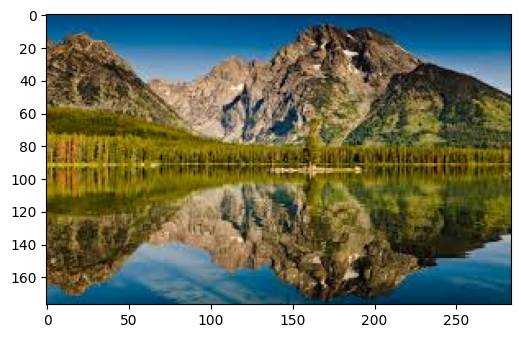

In [20]:
# Read image
image = plt.imread('./data/example.jpeg')

# Plot image
plt.figure(figsize=(6,4))
plt.imshow(image)

### Spatial data

#### Polygon map of municipalities in the canton of Zürich

In [21]:
# Read spatial data
polys = './data/GEN_A4_GEMEINDEN_2019_epsg4326.json'

# Initialisierung der Map
m = folium.Map(location=[47.44, 8.65], zoom_start=10)

# Map settings
folium.Choropleth(
    geo_data=polys,
    name='polys',
    fill_color='greenyellow'
).add_to(m)

folium.LayerControl().add_to(m)

# Plot map
m

#### Overpass turbo query to get all available restaurants in a defined city

In [22]:
# Overpass API URL
url = 'http://overpass-api.de/api/interpreter'

# Overpass turbo query
query = """
[out:json];
area[name="Winterthur"]->.searchArea;
node["amenity"="restaurant"](area.searchArea);
out body;
"""

# Web API request
r = requests.get(url, params={'data': query})
data = r.json()['elements']

# Save data to file
with open('./data/restaurants.json', 'w') as json_file:
    json.dump(data, json_file)

# Store data in data frame
df = pd.json_normalize(data)
df.head()

,type,id,lat,lon,tags.amenity,tags.level,tags.name,tags.opening_hours,tags.indoor_seating,tags.outdoor_seating,...,tags.addr:housename,tags.access,tags.delivery:covid19,tags.takeaway:covid19,tags.note,tags.leisure,tags.sport,tags.name:de,tags.organic,tags.payment:cards
0,node,34039212,47.495518,8.741556,restaurant,1,Hallenbadrestaurant Geiselweid,"Tu-Fr 09:00-21:00; Mo 11:30-21:00; Sa,Su 09:00...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,34040796,47.483065,8.705704,restaurant,NaN,Schwimmbadrestaurant Töss,NaN,no,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,246249861,47.500050,8.731263,restaurant,0,Tibits,Mo 07:00-22:00; Tu-Fr 07:00-22:30; Sa 08:00-22...,NaN,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,246253651,47.499747,8.726492,restaurant,NaN,Casinotheater Restaurant Fredi,"Mo 11:00-22:30; Tu,We 09:00-22:30; Th,Fr 09:00...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,247766478,47.497957,8.727372,restaurant,NaN,grepery,Mo-Th 09:00-24:00; Fr-Sa 09:00-01:00; Su 09:00...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Plot restaurants on map

In [23]:
# Subset of gas stations by brand
locations = df[["lat", "lon", "tags.name"]]
print(locations.head(5))

# Create map
map = folium.Map(location=[locations.lat.mean(), 
                           locations.lon.mean()], 
                 zoom_start=14, 
                 control_scale=True)

# Add maker symbols
for index, location_info in locations.iterrows():
    folium.Marker([location_info["lat"], 
                   location_info["lon"]], 
                  popup=location_info["tags.name"]).add_to(map)

# Plot map
map

         lat       lon                       tags.name
0  47.495518  8.741556  Hallenbadrestaurant Geiselweid
1  47.483065  8.705704       Schwimmbadrestaurant Töss
2  47.500050  8.731263                          Tibits
3  47.499747  8.726492  Casinotheater Restaurant Fredi
4  47.497957  8.727372                         grepery


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [24]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2025-03-05 12:02:31
Python Version: 3.11.11
-----------------------------------
